Using device: cuda:0


/tmp/ipykernel_1791457/3100760237.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_location=device)


Loaded model from swin_2class_best.pth
Number of test samples: 543


Testing:   0%|          | 0/17 [00:00<?, ?it/s]/home/nitin/miniforge3/envs/acps_salmaan/lib/python3.8/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (108576768 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/nitin/miniforge3/envs/acps_salmaan/lib/python3.8/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (108576768 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/nitin/miniforge3/envs/acps_salmaan/lib/python3.8/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (108576768 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/nitin/miniforge3/envs/acps_salmaan/lib/python3.8/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (108576768 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/nitin/m


Initial Evaluation (Threshold=0.5)
--------------------------------------------------
Accuracy: 0.5249
Precision: 0.9239
Recall: 0.5308
F1 Score: 0.6742
ROC AUC: 0.5321
Threshold: 0.50

Classification Report:
                 precision    recall  f1-score   support

Non-adulterated       0.07      0.45      0.12        40
    Adulterated       0.92      0.53      0.67       503

       accuracy                           0.52       543
      macro avg       0.50      0.49      0.40       543
   weighted avg       0.86      0.52      0.63       543

Confusion Matrix:
[[ 18  22]
 [236 267]]


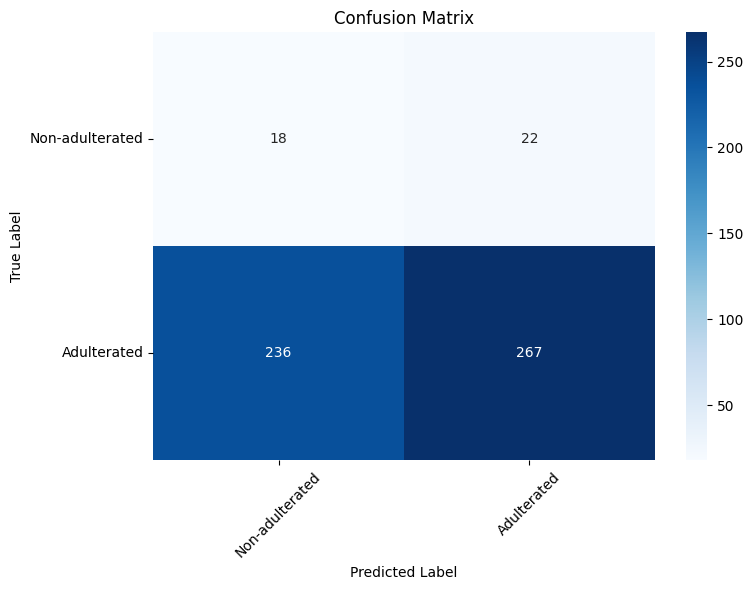


Finding optimal threshold based on F1 score:
Threshold: 0.10 => F1: 0.9104
Threshold: 0.15 => F1: 0.8793
Threshold: 0.20 => F1: 0.8261
Threshold: 0.25 => F1: 0.7764
Threshold: 0.30 => F1: 0.7414
Threshold: 0.35 => F1: 0.7301
Threshold: 0.40 => F1: 0.7004
Threshold: 0.45 => F1: 0.6801
Threshold: 0.50 => F1: 0.6742
Threshold: 0.55 => F1: 0.6468
Threshold: 0.60 => F1: 0.6422
Threshold: 0.65 => F1: 0.6232
Threshold: 0.70 => F1: 0.6137
Threshold: 0.75 => F1: 0.5879
Threshold: 0.80 => F1: 0.5467
Threshold: 0.85 => F1: 0.4732

Best threshold: 0.10 with F1: 0.9104


Testing:   0%|          | 0/17 [00:00<?, ?it/s]/home/nitin/miniforge3/envs/acps_salmaan/lib/python3.8/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (108576768 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/nitin/miniforge3/envs/acps_salmaan/lib/python3.8/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (108576768 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/nitin/miniforge3/envs/acps_salmaan/lib/python3.8/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (108576768 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/nitin/miniforge3/envs/acps_salmaan/lib/python3.8/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (108576768 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/nitin/m


Optimal Evaluation (Threshold=0.10)
--------------------------------------------------
Accuracy: 0.8379
Precision: 0.9332
Recall: 0.8887
F1 Score: 0.9104
ROC AUC: 0.5321
Threshold: 0.10

Classification Report:
                 precision    recall  f1-score   support

Non-adulterated       0.12      0.20      0.15        40
    Adulterated       0.93      0.89      0.91       503

       accuracy                           0.84       543
      macro avg       0.53      0.54      0.53       543
   weighted avg       0.87      0.84      0.85       543

Confusion Matrix:
[[  8  32]
 [ 56 447]]


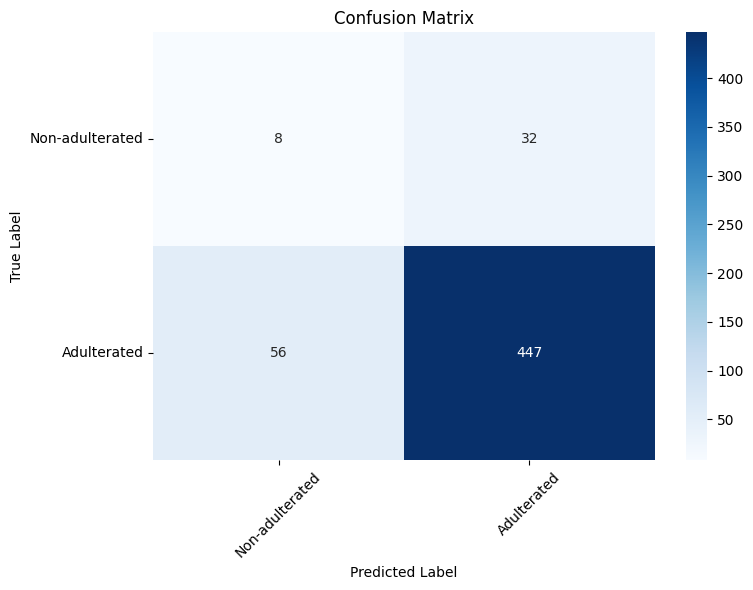

In [3]:
import os
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from timm.models.swin_transformer import SwinTransformer
from PIL import Image
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

class MilkAdulterationDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.data = []
        self.transform = transform
        
        for fat in os.listdir(root_dir):
            fat_path = os.path.join(root_dir, fat)
            if not os.path.isdir(fat_path):
                continue

            for percent in os.listdir(fat_path):
                percent_path = os.path.join(fat_path, percent)

                if percent == '0':
                    # Non-adulterated (class 0)
                    for img_name in os.listdir(percent_path):
                        if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                            self.data.append({
                                "img_path": os.path.join(percent_path, img_name),
                                "label": 0
                            })
                else:
                    # Adulterated (class 1)
                    for adulterant in os.listdir(percent_path):
                        adulterant_path = os.path.join(percent_path, adulterant)
                        if os.path.isdir(adulterant_path):
                            for img_name in os.listdir(adulterant_path):
                                if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                                    self.data.append({
                                        "img_path": os.path.join(adulterant_path, img_name),
                                        "label": 1
                                    })

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        image = Image.open(sample["img_path"]).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, sample["label"]

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

index_to_class = {0: "Non-adulterated", 1: "Adulterated"}

def load_model(model_path, device):
    model = SwinTransformer(
        img_size=224,
        patch_size=4,
        in_chans=3,
        num_classes=2,
        embed_dim=96,
        depths=[2, 2, 6, 2],
        num_heads=[3, 6, 12, 24],
        window_size=7,
    )
    
    state_dict = torch.load(model_path, map_location=device)
    if all(k.startswith('module.') for k in state_dict.keys()):
        state_dict = {k.replace('module.', ''): v for k, v in state_dict.items()}
    
    model.load_state_dict(state_dict)
    model = model.to(device)
    model.eval()
    return model

def evaluate_model(model, dataloader, device, threshold=0.5):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(dataloader, desc='Testing'):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)
            preds = (probs[:, 1] > threshold).long()
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs[:, 1].cpu().numpy())
    
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_probs)
    conf_matrix = confusion_matrix(all_labels, all_preds)
    class_report = classification_report(all_labels, all_preds, target_names=list(index_to_class.values()))
    
    # Return both metrics and the raw probabilities/labels for threshold optimization
    return {
        'metrics': {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc,
            'confusion_matrix': conf_matrix,
            'classification_report': class_report,
            'threshold_used': threshold
        },
        'probs': all_probs,
        'labels': all_labels
    }

def print_metrics(results, title):
    metrics = results['metrics']
    print(f"\n{title}")
    print("-" * 50)
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1_score']:.4f}")
    print(f"ROC AUC: {metrics['roc_auc']:.4f}")
    print(f"Threshold: {metrics['threshold_used']:.2f}")
    print("\nClassification Report:")
    print(metrics['classification_report'])
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])

def plot_confusion_matrix(cm, classes, filename):
    plt.figure(figsize=(8, 6))
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

def find_optimal_threshold(probs, labels):
    thresholds = np.arange(0.1, 0.9, 0.05)
    best_f1 = 0
    best_threshold = 0.5
    
    print("\nFinding optimal threshold based on F1 score:")
    for thresh in thresholds:
        preds = (np.array(probs) > thresh).astype(int)
        current_f1 = f1_score(labels, preds)
        print(f"Threshold: {thresh:.2f} => F1: {current_f1:.4f}")
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_threshold = thresh
    
    print(f"\nBest threshold: {best_threshold:.2f} with F1: {best_f1:.4f}")
    return best_threshold

def main():
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    model_path = 'swin_2class_best.pth'
    model = load_model(model_path, device)
    print(f"Loaded model from {model_path}")
    
    test_root = 'test_data/RGB_TEST'  # Update this path
    test_dataset = MilkAdulterationDataset(test_root, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)
    print(f"Number of test samples: {len(test_dataset)}")
    
    # Initial evaluation with default threshold
    default_results = evaluate_model(model, test_loader, device, threshold=0.5)
    print_metrics(default_results, "Initial Evaluation (Threshold=0.5)")
    plot_confusion_matrix(default_results['metrics']['confusion_matrix'], 
                         list(index_to_class.values()), 
                         'confusion_matrix_default_threshold.png')
    
    # Find optimal threshold
    optimal_threshold = find_optimal_threshold(default_results['probs'], default_results['labels'])
    
    # Evaluate with optimal threshold
    optimal_results = evaluate_model(model, test_loader, device, threshold=optimal_threshold)
    print_metrics(optimal_results, f"Optimal Evaluation (Threshold={optimal_threshold:.2f})")
    plot_confusion_matrix(optimal_results['metrics']['confusion_matrix'], 
                         list(index_to_class.values()), 
                         'confusion_matrix_optimal_threshold.png')
    
    # Save all results
    with open('test_results_2class.txt', 'w') as f:
        f.write("=== Initial Evaluation (Threshold=0.5) ===\n")
        f.write(f"Accuracy: {default_results['metrics']['accuracy']:.4f}\n")
        f.write(f"Precision: {default_results['metrics']['precision']:.4f}\n")
        f.write(f"Recall: {default_results['metrics']['recall']:.4f}\n")
        f.write(f"F1 Score: {default_results['metrics']['f1_score']:.4f}\n")
        f.write(f"ROC AUC: {default_results['metrics']['roc_auc']:.4f}\n")
        f.write("\nClassification Report:\n")
        f.write(default_results['metrics']['classification_report'])
        f.write("\nConfusion Matrix:\n")
        f.write(str(default_results['metrics']['confusion_matrix']))
        
        f.write("\n\n=== Optimal Evaluation ===\n")
        f.write(f"Optimal Threshold: {optimal_threshold:.2f}\n")
        f.write(f"Accuracy: {optimal_results['metrics']['accuracy']:.4f}\n")
        f.write(f"Precision: {optimal_results['metrics']['precision']:.4f}\n")
        f.write(f"Recall: {optimal_results['metrics']['recall']:.4f}\n")
        f.write(f"F1 Score: {optimal_results['metrics']['f1_score']:.4f}\n")
        f.write(f"ROC AUC: {optimal_results['metrics']['roc_auc']:.4f}\n")
        f.write("\nClassification Report:\n")
        f.write(optimal_results['metrics']['classification_report'])
        f.write("\nConfusion Matrix:\n")
        f.write(str(optimal_results['metrics']['confusion_matrix']))

if __name__ == '__main__':
    main()